<a href="https://colab.research.google.com/github/Sudipta-Mitra/Forecasting-Microsoft-Stock-Price./blob/main/MSFT_STOCK_PREDICTION_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df = pd.read_csv("/content/MSFT_stock_max.csv")

In [ ]:
df.head()

,date,Close,High,Low,Open,Volume
0,10/14/1988,0.218170,0.222427,0.217106,0.221363,56764800
1,10/17/1988,0.221363,0.223491,0.218170,0.218170,25675200
2,10/18/1988,0.223491,0.224556,0.218171,0.220299,37224000
3,10/19/1988,0.226684,0.228813,0.222427,0.227749,80683200
4,10/20/1988,0.227749,0.229877,0.224556,0.224556,73296000


In [ ]:
df.isnull().sum()

,0
date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df = df[['date', 'Close']].dropna()

In [ ]:
df.rename(columns={'date': 'ds', 'Close': 'y'}, inplace=True)

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
model = Prophet(daily_seasonality=False)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j_4zmpa/muxtyqtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4j_4zmpa/z2vbsul3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75076', 'data', 'file=/tmp/tmp4j_4zmpa/muxtyqtp.json', 'init=/tmp/tmp4j_4zmpa/z2vbsul3.json', 'output', 'file=/tmp/tmp4j_4zmpa/prophet_modelbwwujx86/prophet_model-20250622163756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=180)

In [ ]:
forecast = model.predict(future)

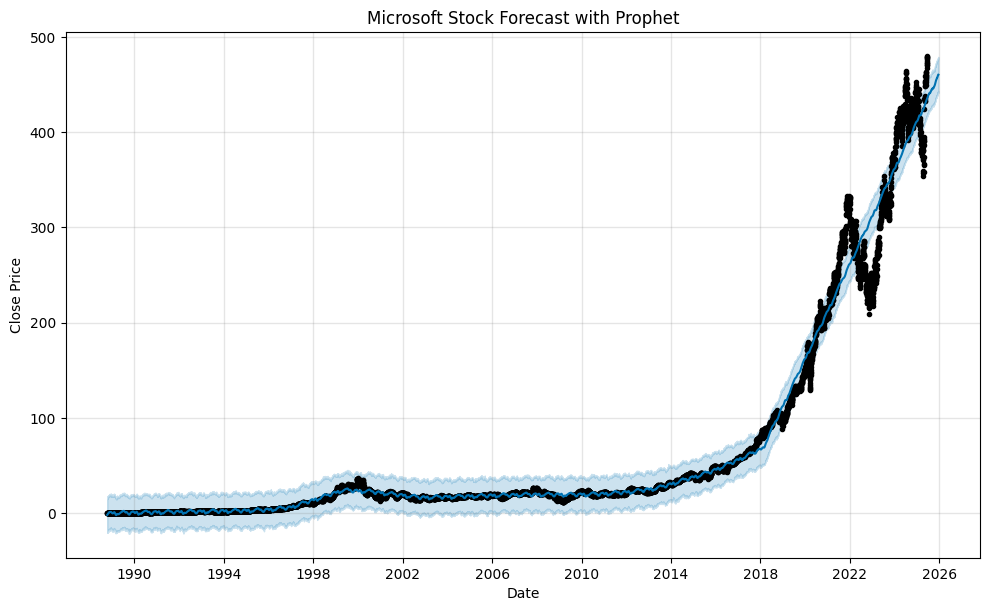

In [ ]:
fig = model.plot(forecast)
plt.title("Microsoft Stock Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
future_only = forecast[forecast['ds'] > df['ds'].max()]

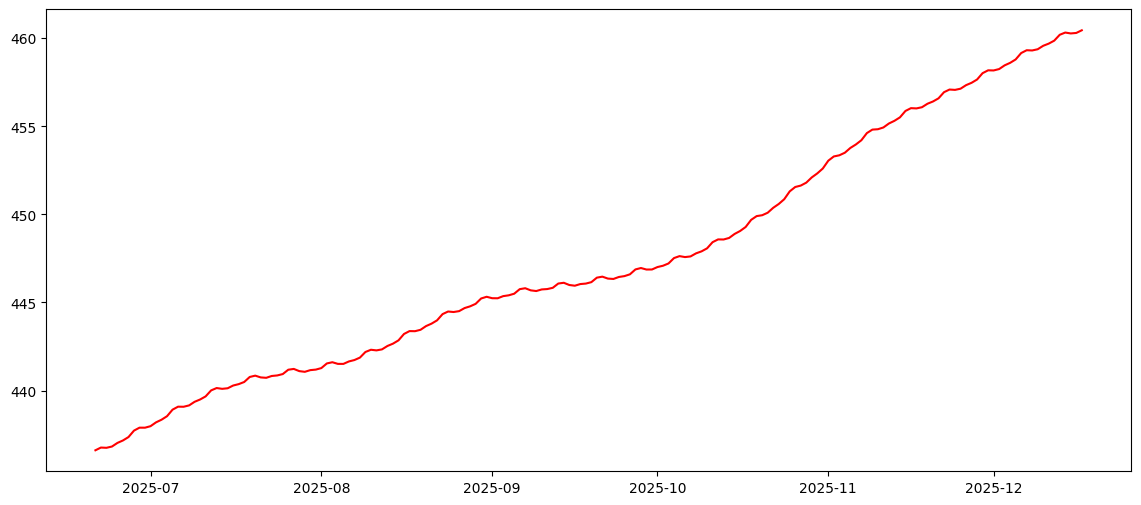

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(future_only['ds'], future_only['yhat'], label='Forecast', color='red')

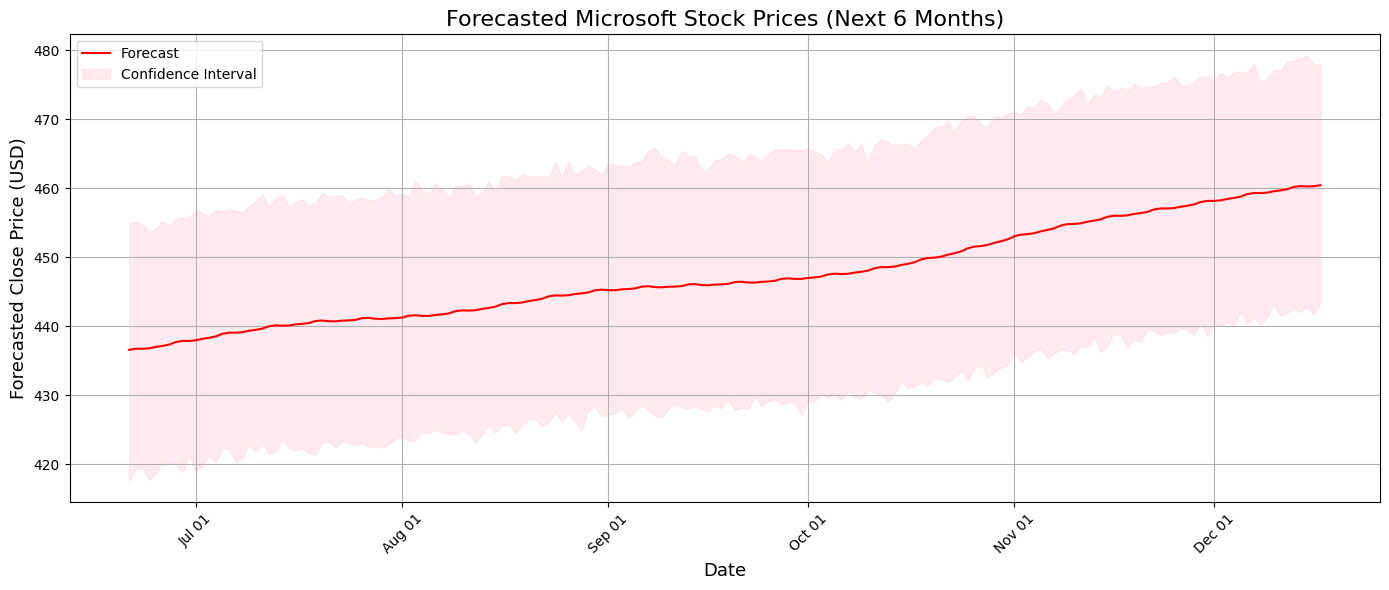

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(future_only['ds'], future_only['yhat'], label='Forecast', color='red')
plt.fill_between(future_only['ds'],
                 future_only['yhat_lower'],
                 future_only['yhat_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')


plt.title("Forecasted Microsoft Stock Prices (Next 6 Months)", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Forecasted Close Price (USD)", fontsize=13)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.tight_layout()
plt.show()


In [ ]:
future_forecast = forecast[forecast['ds'] > df['ds'].max()]

In [ ]:
output = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

In [ ]:
output.rename(columns={
    'ds': 'Date',
    'yhat': 'Forecast',
    'yhat_lower': 'Lower_Bound',
    'yhat_upper': 'Upper_Bound'
}, inplace=True)


In [ ]:
output.to_csv("MSFT_Forecast_Only.csv", index=False)

In [ ]:
from google.colab import files

files.download('MSFT_Forecast_Only.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>